1) Consider the following time series, Yt=6 + 10t + Wt , where Wt is stationary (with zero mean
and variance σ2) and t is time, t= 1, 2, 3 … (12 pts)
<br>
a) Compute the mean of Yt. Please show your work.


Answer:
<br>
Mean of Yt = E(Yt) = E(6 + 10t + Wt)
<br>
Since:
<br>
Expected value of a constant is the constant.
<br>
Since t is a linear term representing time indexes and not a random variable.
<br>
Since Wt is stationary with 0 mean and variance.
<br>
We have:
<br>
E(6 + 10t + Wt) = 6 + 10t + 0 
<br>
= 6 + 10t

b) Based on the result in (a), can you conclude if Yt is stationary or not? Explain
your answer.
<br>
Answer:
<br>
Based on the mean calculate above since it is not constant over time, but it actually increases with t, then Yt is not a stationary timeseries.

c) Compute the first difference (Zt) of Yt. Please show your work.
<br>
Answer:
<br>
Z$_{t}$ = Yt - Yt-1 = 6 + 10t + W$_{t}$ - 6 - 10(t-1) - W$_{t-1}$ 
<br>
= 10t - 10t + 10 + W$_{t}$ - W$_{t-1}$ 
<br>
Z$_{t}$= 10 + W$_{t}$ - W$_{t-1}$

2) Consider the measurement data provided in the file: Measurement_Q1.xls. <br>
(For Q2(a) and Q2(b) below, please do not use an external package/library to implement the
moving average window)
<br>
a. Use an 11-period simple moving average to smooth the data. Plot the
smoothed result and the original time series in the same graph.

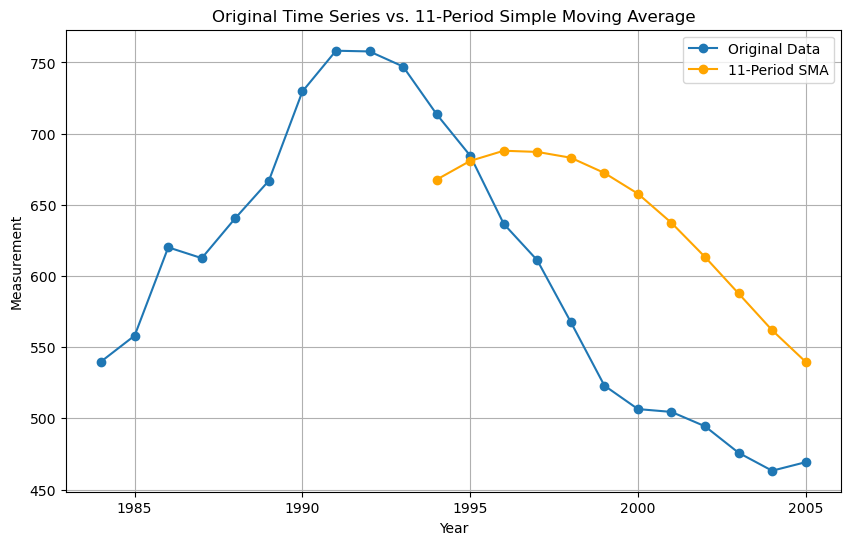

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

measurement_data_path = 'data/data_2/MeasurementData_Q1.xlsx'
measurement_data = pd.read_excel(measurement_data_path)
# Manually compute the 11-period simple moving average
def manual_moving_average(data, window):
    sma = []
    for i in range(len(data)):
        if i < window - 1:
            # Not enough data points for the first few entries
            sma.append(None)
        else:
            # Calculate the average of the current window
            window_data = data[i-window+1:i+1]
            average = sum(window_data) / window
            sma.append(average)
    return sma

# Apply manual moving average calculation for 11-period
measurement_data['11_Period_SMA'] = manual_moving_average(measurement_data['Measurement'], 11)

# Plot the original data and manually calculated 11-period simple moving average
plt.figure(figsize=(10, 6))
plt.plot(measurement_data['Year'], measurement_data['Measurement'], label='Original Data', marker='o')
plt.plot(measurement_data['Year'], measurement_data['11_Period_SMA'], label='11-Period SMA', color='orange', marker='o')
plt.xlabel('Year')
plt.ylabel('Measurement')
plt.title('Original Time Series vs. 11-Period Simple Moving Average')
plt.legend()
plt.grid(True)
plt.show()


b. (3 pts) Repeat the procedure with a 5-period simple moving average. Plot the
smoothed result and the original time series in the same graph.

Text(0.5, 1.0, 'Original Time Series vs. 5-Period Simple Moving Average')

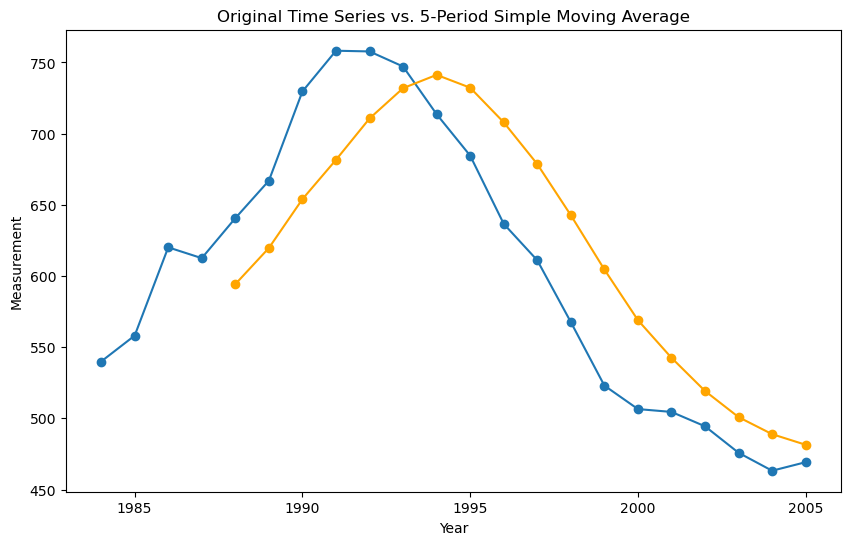

In [15]:
measurement_data['5_period_SMA'] = manual_moving_average(measurement_data['Measurement'], 5)
plt.figure(figsize=(10, 6))
plt.plot(measurement_data['Year'], measurement_data['Measurement'], label='Original Data', marker='o')
plt.plot(measurement_data['Year'], measurement_data['5_period_SMA'], label='5-Period SMA', color='orange', marker='o')
plt.xlabel('Year')
plt.ylabel('Measurement')
plt.title('Original Time Series vs. 5-Period Simple Moving Average')

c. What is the effect of changing the span (length) of the simple moving average
window? Explain briefly.
<br>
Answer:
<br>
By changing the length of the simple moving average we are taking into consideration a different number of past values.
<br> 
-The first noticeable change in the plot is that the SMA plot starts later than the original timeseries plot by as much as the length of the SMA window is.
<br>
-The larger the lengths of the window the better the overall trend of the data is captured, but if we have sharp changes in the data, the larger window will take more time to reflect it. As we can notice in the first graph where the SMA is still growing when we have a sharp decline in the values of the original data. 
<br>
-In the second graph with 5 period SMA we can see that the sharp changes in the data are reflected faster, but we need to be careful in cases with a lot of noise as the smoothing effect may be less valuable.


3) Solve the following problem. Ideally, you would work out the solution on pen/paper. You can
then scan your solution and attach it with the rest of the homework. (8 pts)
<br>
a. Consider the N-span simple moving average applied to data (yt) that are
independent and uncorrelated with mean μ and variance σ2
. Show that the variance
of the moving average (Mt) is Var(Mt) = σ² / N.
<br>
Mt = yT+yT−1+yT−2+⋯+yT−N+1
<br>
[<img src="./data/data_2/3_a.jpg" width="800"/>](./data/data_2/3_a.jpg)

b. (4 pts) Consider an N-span moving average where each observation is weighted by
a constant, say, aj > 0. Therefore, the weighted moving average at the end of
period T is, Mtw= ∑ at+1−ty$_{t}$ (t from T-N+1 to T). The variance if the original timeseries y$_{t}$ is σ2. Show that Var(Mtw) = σ2  ∑ a$_{j}$2 (j from 1 to N)
[<img src="./data/data_2/3_b.jpg" width="800"/>](./data/data_2/3_b.jpg)

4) The file: cod.csv contains monthly sales data over a two-year period. Apply a simple
exponential smoothing model to answer the following questions. (In Python, you can use the function “SimpleExpSmoothing” from the statsmodels.tsa.holtwinters package):
<br>
a. Fit a simple exponential smoothing model to the entire time series provided.
Vary the exponential smoothing parameter from 0 to 0.1 (both included) in
increments of 0.02 and compute the Mean Square Error (MSE) for each of these
values.

In [16]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error

sales_data_path = 'data/data_2/cod.csv'
sales_data = pd.read_csv(sales_data_path)
# sales_data.head()

In [17]:
import numpy as np
# Extract the relevant time series data
sales_data = sales_data['COD']

# Define a list of smoothing parameters to evaluate with np from 0 to 0.1, since it excludes the endpoint we add 0.02 to it
smoothing_parameters = np.arange(0, 0.12, 0.02).tolist()
# smoothing_parameters = [0.00, 0.02, 0.04, 0.06, 0.08, 0.10]

# Dictionary to store the MSE for each smoothing parameter
mse_results = {}

# Fit the Simple Exponential Smoothing model for each smoothing parameter
for alpha in smoothing_parameters:
    model = SimpleExpSmoothing(sales_data).fit(smoothing_level=alpha, optimized=False)
    predictions = model.fittedvalues
    mse = mean_squared_error(sales_data, predictions)
    mse_results[alpha] = mse

# Display the MSE results
mse_results


b. Produce a plot of MSE vs exponential smoothing parameter based on your
results in (a). Based on this analysis, what do you suggest would be the best
smoothing parameter choice? Why?
<br>
<br>
Answer:
<br>
As we can see in the plot below the lowest MSE for our "predictions" done with Simple Exponential Smoothing is produced by alpha 0.04 indicating the closest fit to the actual data.
<br>
Best smoothing parameter choice is 0.04.

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(mse_results.keys(), mse_results.values(), marker='o')
plt.grid(True)
plt.xlabel('Smoothing Parameter (alpha)')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

c. Now, use the auto-optimization feature of the “SimpleExpSmoothing” function
and report the value obtained for the smoothing parameter. Compare this value with
what you found in (b) ?
<br>
<br>
Answer:
<br>
As we can see below the auto-optimized parameter is much lower than the best one we found with manual choice of the parameter range.
<br>
0.04 and 0.0005467926610103576
<br>
Since the best smoothing parameter is so small it means that we are putting more emphasis on past values and thus the process(sales per month) is not heavily influenced by new values and is fairly stable.

In [21]:
sales_data_path = 'data/data_2/cod.csv'
sales_data = pd.read_csv(sales_data_path)
sales_data = sales_data['COD']
auto_optim_model = SimpleExpSmoothing(sales_data).fit(optimized=True)
optimized_alpha_parameter = auto_optim_model.model.params['smoothing_level']
optimized_alpha_parameter

0.0005467926610103576